<a href="https://colab.research.google.com/github/ravivarmakumar/INFO-5505-Spring-2022/blob/main/RaviVarmaKumarBevara_INFO5505_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-5505 Applied Machine Learning for Data Scientists


### Assignment 6 - Convolutional Neural Network and Alex Net


- Name: Ravi Varma Kumar Bevara
- Student ID : 11476678

**Neural Networks**
<font color='red'>
> A neural network is a set of algorithms that attempts to recognize underlying relationships in a piece of data using a method that is similar to how the human brain works. 
<br/>
</font>

A neural network (NN), just like a regression or an SVM model, is a mathematical function...

\begin{equation}
y = f_N(x)
\end{equation}

The function has a particular form as it’s a nested function. You have probably already heard of neural network layers. So, for a 3-layer neural network that returns a scalar,function looks like this...

\begin{equation}
y = f_3(f_2(f_1(x)))
\end{equation}

In the above equation, f1 and f2 are vector functions with the following 

\begin{equation}
f_l(z) = g_l(W_l(z)+b_l)
\end{equation}

where 'l' is called the layer index and can span from 1 to any number of layers. The function 'g' is called an activation function. The parameters 'W'
(matrix) and b (vector) for each layer are learned using the familiar gradient descent by optimizing, depending on the task, a particular cost function (such as MSE).


**Convolutional Neural Network**

A convolutional neural network (CNN) is a special kind of FFNN that significantly reduces the number of parameters in a deep neural network with many units without losing too much in the quality of the model. CNNs have found applications in image and text processing where they beat many previously established benchmarks.

![](https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG)

- A ConvNet architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)
There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)
- Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function
- Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)
- Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)



#### Checking for GPU

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#### Importing Libraries

In [ ]:
import os
import glob as gb
import cv2
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import matplotlib.image as implt
from tqdm import tqdm

For the dataset, I decided to save the data on the cloud which is google drive, It would be compactable with google cloab

####Mounting my google drive for the dataset access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Distribution of images among the classes in Train, Test, Prediction Data

In [ ]:
print('Train Data ')
print('-'*70)
for folder in os.listdir('/content/drive/MyDrive/INFO5505-Spring2022/seg_train/seg_train'):
  trainFiles=gb.glob(pathname='/content/drive/MyDrive/INFO5505-Spring2022/seg_train/seg_train' + '/' + folder +'/*.jpg')
  print(f'{len(trainFiles):4} images are founnd in {folder} folder.')

Train Data 
----------------------------------------------------------------------
2191 images are founnd in buildings folder.
2271 images are founnd in forest folder.
2404 images are founnd in glacier folder.
2512 images are founnd in mountain folder.
2274 images are founnd in sea folder.
2382 images are founnd in street folder.


In [ ]:
print('Test Data ')
print('-'*70)
for folder in os.listdir('/content/drive/MyDrive/INFO5505-Spring2022/seg_test/seg_test'):
  testFiles=gb.glob(pathname='/content/drive/MyDrive/INFO5505-Spring2022/seg_test/seg_test' + '/' + folder +'/*.jpg')
  print(f'{len(testFiles):4} images are founnd in {folder} folder.')

Test Data 
----------------------------------------------------------------------
 437 images are founnd in buildings folder.
 474 images are founnd in forest folder.
 553 images are founnd in glacier folder.
 525 images are founnd in mountain folder.
 510 images are founnd in sea folder.
 501 images are founnd in street folder.


In [ ]:
print('Prediction Data ')
print('-'*70)
files= gb.glob(pathname=str('/content/drive/MyDrive/INFO5505-Spring2022/seg_pred/seg_pred' + "/*.jpg"))
print(f"{len(files)} images are found in predict data.")

Prediction Data 
----------------------------------------------------------------------
7301 images are found in predict data.


#### Loading the Data

In [ ]:
# declaring the classes and it's indexes

class_names = ['buildings', 'forest','glacier','mountain','sea','street']
class_labels = {'buildings': 0, 'forest': 1, 'glacier' :2, 'mountain': 3, 'sea': 4, 'street': 5 }

In [ ]:
from sklearn.utils import shuffle 

def load_dataset(data_dir):
    images = []
    labels = []
    for class_name in class_names:
            path = os.path.join(data_dir,class_name)
            for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array,(50,50))
                images.append(img_array)
                labels.append(class_labels[class_name])
    
    images, labels = shuffle(images,labels)
    images = np.array(images)
    labels = np.array(labels)
    
    return (images,labels)

In [ ]:
(X_train,Y_train) = load_dataset('/content/drive/MyDrive/INFO5505-Spring2022/seg_train/seg_train')
(X_test,Y_test) = load_dataset('/content/drive/MyDrive/INFO5505-Spring2022/seg_test/seg_test')

print('Total Number of Train images = '+ str(Y_train.shape[0]))
print('Total Number of Test images = '+ str(Y_test.shape[0]))

Total Number of Train images = 14034
Total Number of Test images = 3000


#### Sample Images from Train and Test Data

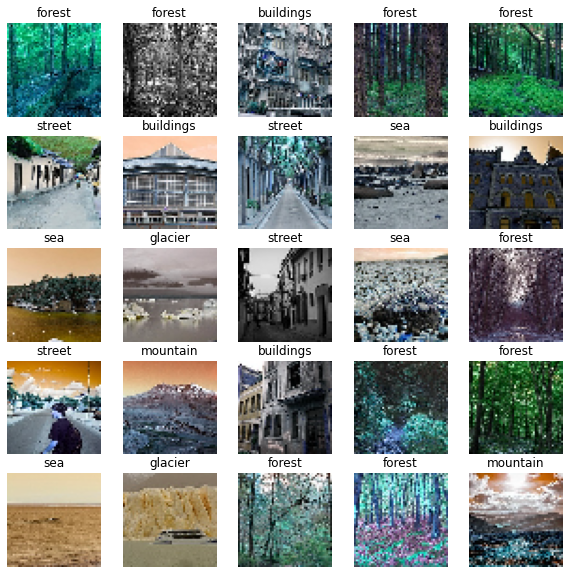

In [ ]:
#training images

fig,ax = plt.subplots(5,5,figsize = (10,10))
for i in range(5):
    for j in range(5):
        index = np.random.randint(X_train.shape[0])
        ax[i][j].imshow(X_train[index])
        ax[i][j].axis('off')
        ax[i][j].set_title(class_names[Y_train[index]])

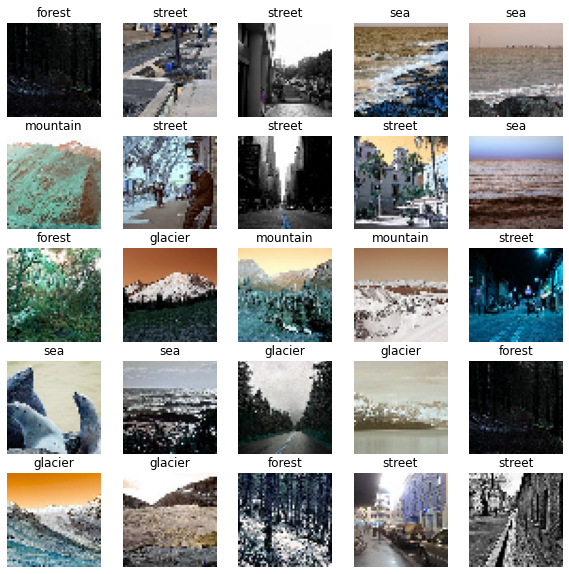

In [ ]:
#testing images

fig,ax = plt.subplots(5,5,figsize = (10,10))
for i in range(5):
    for j in range(5):
        index = np.random.randint(X_test.shape[0])
        ax[i][j].imshow(X_test[index])
        ax[i][j].axis('off')
        ax[i][j].set_title(class_names[Y_test[index]])

#### Visualizing the % of records in Train, Test Data foreach class

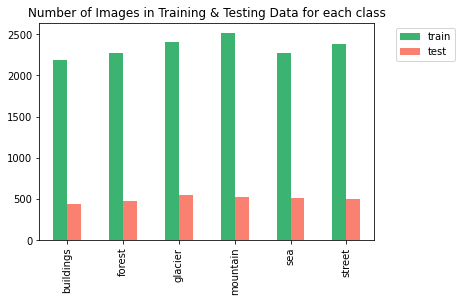

In [ ]:
_, numTrainingImages = np.unique(Y_train, return_counts=True)
_, numTestingImages = np.unique(Y_test, return_counts=True)
pd.DataFrame({'train': numTrainingImages,'test': numTestingImages}, index=class_labels).plot.bar(color={'train':'mediumseagreen','test':'salmon'})
plt.title('Number of Images in Training & Testing Data for each class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

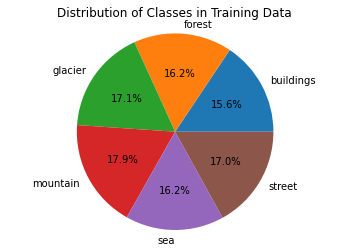

In [ ]:
plt.pie(numTrainingImages, explode=(0, 0, 0, 0, 0, 0) , labels=class_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Classes in Training Data')
plt.show()

#### Rescaling the images to standardise the **data**

In [ ]:
X_train = X_train/255.0
X_test = X_test /255.0

#### Convoltional Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
cnnModel = Sequential()
cnnModel.add(Conv2D(200,(3,3),activation = 'relu', input_shape = (50,50,3)))
cnnModel.add(MaxPooling2D(pool_size=(2,2)))
cnnModel.add(Conv2D(150,(3,3),activation = 'relu'))
cnnModel.add(MaxPooling2D(pool_size=(2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(150,activation = 'relu'))
cnnModel.add(Dense(100,activation = 'relu'))
cnnModel.add(Dense(70,activation = 'relu'))
cnnModel.add(Dense(50,activation = 'relu'))
cnnModel.add(Dropout(rate=0.5))
cnnModel.add(Dense(6,activation = 'softmax'))
cnnModel.summary()

cnnModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 200)       5600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 150)       270150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 150)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18150)             0         
                                                                 
 dense (Dense)               (None, 150)               2

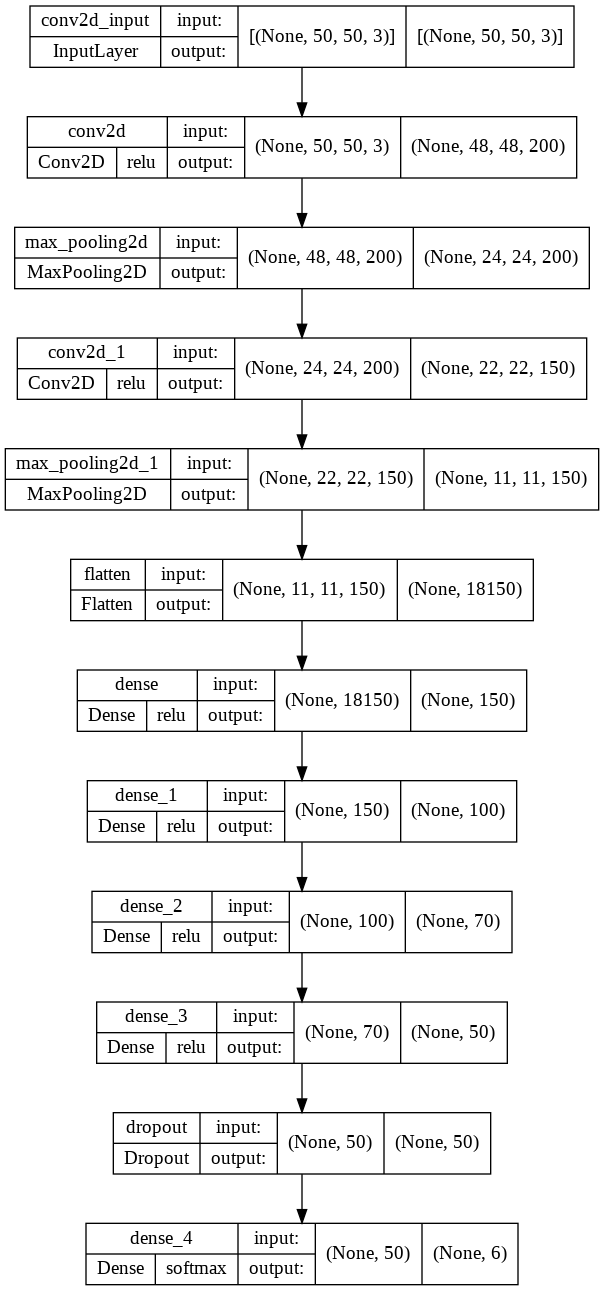

In [ ]:
tf.keras.utils.plot_model(cnnModel,show_shapes=True,show_layer_names=True,show_layer_activations=True, rankdir='TB', expand_nested=False)

In [ ]:
cnnModelTraining = cnnModel.fit(X_train,Y_train, batch_size= 64,epochs=30)

Epoch 1/30
220/220 [==============================] - 13s 13ms/step - loss: 1.2854 - accuracy: 0.4751
Epoch 2/30
220/220 [==============================] - 3s 13ms/step - loss: 0.9752 - accuracy: 0.6288
Epoch 3/30
220/220 [==============================] - 3s 13ms/step - loss: 0.8635 - accuracy: 0.6909
Epoch 4/30
220/220 [==============================] - 3s 13ms/step - loss: 0.7763 - accuracy: 0.7258
Epoch 5/30
220/220 [==============================] - 3s 13ms/step - loss: 0.7134 - accuracy: 0.7525
Epoch 6/30
220/220 [==============================] - 3s 13ms/step - loss: 0.6263 - accuracy: 0.7874
Epoch 7/30
220/220 [==============================] - 3s 13ms/step - loss: 0.5583 - accuracy: 0.8133
Epoch 8/30
220/220 [==============================] - 3s 13ms/step - loss: 0.5166 - accuracy: 0.8288
Epoch 9/30
220/220 [==============================] - 3s 13ms/step - loss: 0.4634 - accuracy: 0.8478
Epoch 10/30
220/220 [==============================] - 3s 13ms/step - loss: 0.4056 - accur

In [ ]:
cnnModel.evaluate(X_test, Y_test,verbose=1)

94/94 [==============================] - 1s 4ms/step - loss: 1.8008 - accuracy: 0.7683


[1.800770878791809, 0.7683333158493042]

#### 10-Fold Validation

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

def KFoldCrossValidation(numOfFolds, X, y, mlModel):
  foldsHistory = []
  for i in range(numOfFolds):
      print("Training on Fold: ",i+1)
      foldsHistory.append(mlModel.fit(X, y, epochs=30, callbacks=[EarlyStopping(monitor='val_loss', patience=2, verbose=1)], verbose=1, validation_split=0.1))
      print("*"*70, end="\n\n")

  return foldsHistory

In [ ]:
cnnValidation = KFoldCrossValidation(10, X_train,Y_train, cnnModel)

Training on Fold:  1
Epoch 1/30
395/395 [==============================] - 4s 9ms/step - loss: 0.1505 - accuracy: 0.9549 - val_loss: 0.1143 - val_accuracy: 0.9601
Epoch 2/30
395/395 [==============================] - 3s 8ms/step - loss: 0.1263 - accuracy: 0.9633 - val_loss: 0.0800 - val_accuracy: 0.9715
Epoch 3/30
395/395 [==============================] - 3s 8ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.2233 - val_accuracy: 0.9345
Epoch 4/30
395/395 [==============================] - 3s 8ms/step - loss: 0.0724 - accuracy: 0.9783 - val_loss: 0.3472 - val_accuracy: 0.9174
Epoch 4: early stopping
**********************************************************************

Training on Fold:  2
Epoch 1/30
395/395 [==============================] - 3s 9ms/step - loss: 0.0987 - accuracy: 0.9724 - val_loss: 0.1090 - val_accuracy: 0.9715
Epoch 2/30
395/395 [==============================] - 3s 8ms/step - loss: 0.0639 - accuracy: 0.9826 - val_loss: 0.1444 - val_accuracy: 0.9601
Epoch 3/30

In [ ]:
_, testAccuracy = cnnModel.evaluate(X_test,Y_test)
print('Test Accuracy after 10-Fold Cross Validation :', testAccuracy)

94/94 [==============================] - 0s 4ms/step - loss: 2.6072 - accuracy: 0.7493
Test Accuracy after 10-Fold Cross Validation : 0.7493333220481873


In [ ]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.plot(history.history['accuracy'],'bo-', label = "Accuracy")
    plt.plot(history.history['loss'],'ro-', label = "Loss")
    plt.ylabel("accuracy & loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.legend()
    plt.show()

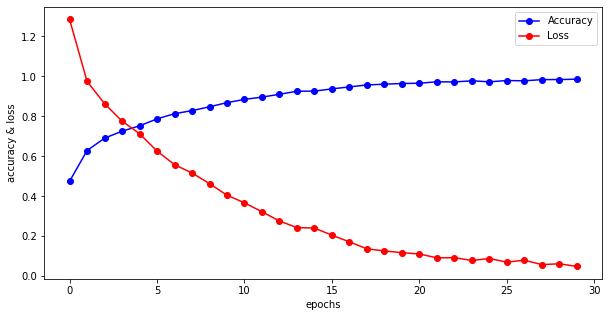

In [ ]:
plot_accuracy_loss(cnnModelTraining)

#### Visualizing the Model

In [ ]:
!pip install ann_visualizer

from ann_visualizer.visualize import ann_viz;
ann_viz(cnnModel, view=True, title="CNN-Image Classification")

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=5027f5d95af43b68439ab11fa8221568702126d1268223d695713406932d20ee
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


#### Predictions of Images using CNN

In [ ]:
from pathlib import Path

def load_predData(data_dir):
    images=[]
    for path in Path(data_dir).iterdir():
            if path.name.endswith('.jpg'):
                    img = cv2.imread(str(path))
                    img = cv2.resize(img,(50,50))
                    images.append(img)
    return images

predimages = load_predData('/content/drive/MyDrive/INFO5505-Spring2022/seg_pred/seg_pred')
pred_images = np.array(predimages)
pred_images.shape

(7301, 50, 50, 3)

In [ ]:
cnnPredictions = cnnModel.predict(pred_images)
print('Prediction Shape is {}'.format(cnnPredictions.shape))

Prediction Shape is (7301, 6)


In [ ]:
def getcode(n) : 
    for x , y in class_labels.items() : 
        if n == y : 
            return x  

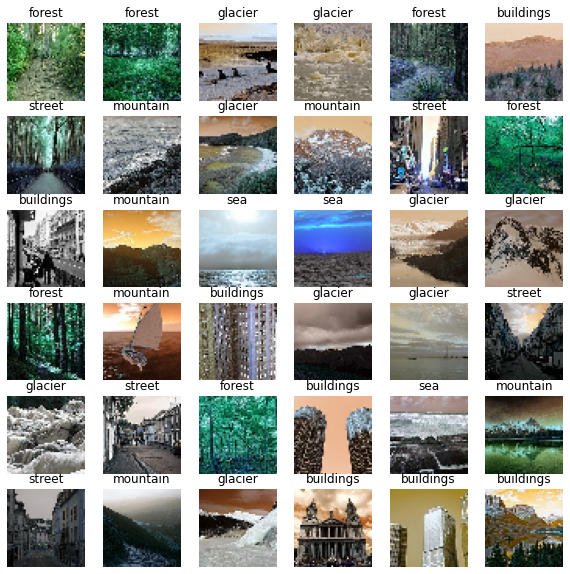

In [ ]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(pred_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_images[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(cnnPredictions[i])))

#### Confusion Matrix

In [ ]:
cnnPredictStats = cnnModel.predict(X_test)
cnnPredictLabels = np.argmax(cnnPredictStats, axis = 1)

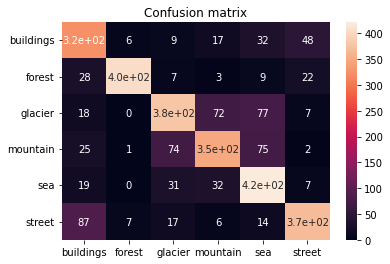

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y_test, cnnPredictLabels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

#### Transfer Learning from AlexNet

In [ ]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms  
import torchvision
from torchvision.transforms import ToTensor,Normalize, RandomHorizontalFlip, Resize
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable

In [ ]:
transform = torchvision.transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
    ])

transform_tests = torchvision.transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
    ])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/INFO5505-Spring2022/seg_train/seg_train',transform=transform)
test_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/INFO5505-Spring2022/seg_test/seg_test',transform=transform_tests)

valid_size = 0.15

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
classes=('buildings','forest','glacier','mountain','sea','street')

train_loader = DataLoader(train_data,batch_size=50,sampler=train_sampler,num_workers=2)
valid_loader = DataLoader(train_data, batch_size =100, sampler=valid_sampler, num_workers=3)
test_loader= DataLoader(test_data,batch_size=32,shuffle=False,num_workers=2)

In [ ]:
train_on_gpu = torch.cuda.is_available()
device =  torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


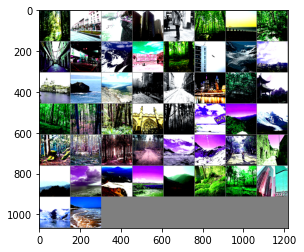

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels1 = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [ ]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
AlexNet_model.eval()
AlexNet_model.classifier[4] = nn.Linear(4096,1024)
AlexNet_model.classifier[6] = nn.Linear(1024,10)
AlexNet_model.eval()
AlexNet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


#### Accuracy for AlexNet

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of AlexNet on the test data: %d %%' % (100 * correct / total))

Accuracy of AlexNet on the test data: 90 %


#### Accuracy per class in AlexNet

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(6):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of buildings : 92 %
Accuracy of forest : 98 %
Accuracy of glacier : 79 %
Accuracy of mountain : 94 %
Accuracy of   sea : 92 %
Accuracy of street : 91 %
